In [40]:
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
data = sp.genfromtxt("web_traffic.tsv", delimiter="\t")

In [2]:
x = data[:,0]
y = data[:,1]


In [3]:
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]


In [8]:
def error(f, x, y):
    return sp.sum((f(x)-y)**2)
fpl, residuals, rank, sv, rcond = sp.polyfit(x, y, 3, full=True)

In [9]:
f1 = sp.poly1d(fpl)


poly1d([ 3.04960132e-05, -2.35893797e-02,  4.94226019e+00,  1.33328797e+03])

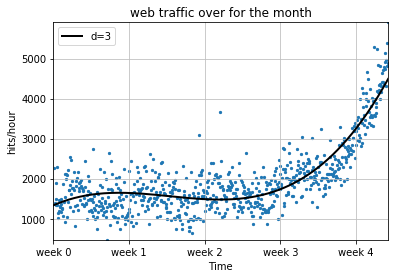

In [10]:
plt.scatter(x,y, s=5)
plt.title("web traffic over for the month")
plt.xlabel("Time")
plt.ylabel("hits/hour")
plt.xticks([w*7*24 for w in range(10)],
           ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')
fx = sp.linspace(0,x[-1], 1000)
plt.plot(fx, f1(fx), linewidth=2, color='black')
plt.legend(["d=%i" % f1.order], loc="upper left")
plt.show()

In [7]:
print(error(f1, x, y))

179983507.8781792


In [48]:
inflection = 3*7*24
xa = x[:inflection]
ya = y[:inflection]
xb = x[inflection:]
yb = y[inflection:]

X_train, x_test,Y_train, y_test = train_test_split(xb,yb,
                                                   test_size=0.20,)

fa = sp.polyfit(xa,ya,2)
fb = sp.polyfit(X_train,Y_train,2)
fa1 = sp.poly1d(fa)
fb1 = sp.poly1d(fb)

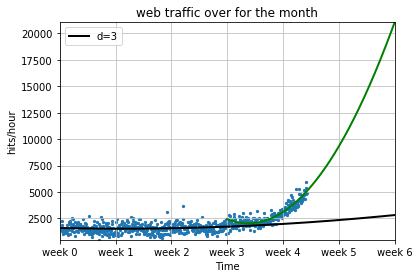

In [49]:
plt.scatter(x,y, s=5)
plt.title("web traffic over for the month")
plt.xlabel("Time")
plt.ylabel("hits/hour")
plt.xticks([w*7*24 for w in range(10)],
           ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')
fx1 = sp.linspace(0,6*7*24, 1000)
fx2 = sp.linspace(inflection,6*7*24, 1000)
plt.plot(fx1, fa1(fx1), linewidth=2, color='black')
plt.plot(fx2, fb1(fx2), linewidth=2, color='green')
plt.legend(["d=%i" % f1.order], loc="upper left")
plt.show()

In [50]:
error(fb1, x_test, y_test)

5813655.987472173

In [51]:
error(fb1, X_train, Y_train)

27642691.122283667